<a href="https://colab.research.google.com/github/DkCodeProjct/AI_Projects..-/blob/main/mnistModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a NN and Train on Mnist Dataset...

   * using more layers
   * using images try to predict what the num



In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2 as cv
from tensorflow.keras.models import load_model


##Mnist dataset

In [ ]:

mnist = tf.keras.datasets.mnist


In [ ]:

# Load the dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain, xTest = xTrain / 255.0, xTest / 255.0

xTrain = xTrain.reshape(xTrain.shape[0], 28, 28, 1)
xTest = xTest.reshape(xTest.shape[0], 28, 28, 1)

yTrain = tf.keras.utils.to_categorical(yTrain, 10)
yTest = tf.keras.utils.to_categorical(yTest, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Building The NN...

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        62, (3, 3), activation='relu', input_shape=(28, 28, 1)
    ),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Dense(60, activation='relu'),

    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(130, activation='relu'),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:

model.fit(xTrain, yTrain, epochs=8)
model.evaluate(xTest, yTest, verbose=2)

fileNm = 'mnistTrainModel.h5'
model.save(fileNm )
print(f"Model saved to {fileNm }.")

NameError: name 'model' is not defined

#TRY to Predict Img

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Predicted class: 3


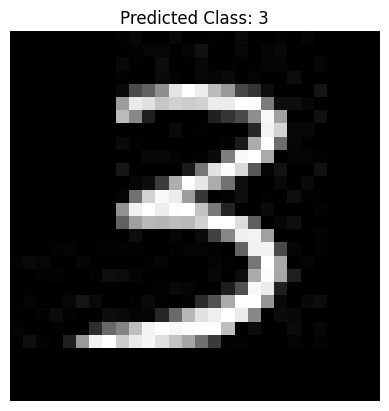

In [6]:
from tensorflow.keras.models import load_model


import matplotlib.pyplot as plt
model = load_model('/content/mnistTrainModel.h5')

imgPath = '/content/img_10.jpg'
img = image.load_img(imgPath, target_size=(28, 28), color_mode='grayscale')



img = image.load_img(imgPath, target_size=(28, 28), color_mode='grayscale')
imgArray = image.img_to_array(img)
imgArray /= 255.0
imgArray = np.expand_dims(imgArray, axis=0)

# Use the loaded model to make predictions
predictions = model.predict(imgArray)
predictedClass = np.argmax(predictions, axis=1)

print(f'Predicted class: {predictedClass[0]}')


plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predictedClass[0]}')
plt.axis('off')  # Turn off axis labels
plt.show()
